In [8]:
import tensorflow as tf
tf.__file__


AttributeError: module 'tensorflow' has no attribute '__file__'

In [9]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of digits

(x_train, y_train), (x_test, y_test) = mnist.load_data()
#loads data as black and white with values from 0-256
#It is easier to train our data if we normalise:

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_train = tf.keras.utils.normalize(x_train, axis = 2)
#we want to normalise across the whole image, but tf seems not to be able to
#do that, so normalising across each row, and then column is good enough
#is this equivalent?

x_test = tf.keras.utils.normalize(x_test, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 2)

AttributeError: module 'tensorflow' has no attribute 'keras'

In [1]:
import pandas

In [2]:
import matplotlib.pyplot as plt

print(x_train.shape)
plt.imshow(x_train[1])
plt.show()

(60000, 28, 28)


<Figure size 640x480 with 1 Axes>

In [5]:
#Choose a model, sequential is a feed-forward model
model = tf.keras.models.Sequential()
#We dont want a 28x28 array, we want to flatten it into a 784 vector
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
model.fit(x_train, y_train, epochs = 3, batch_size = 32)

Epoch 1/3
60000/60000 [==============================] - 3s 57us/step - loss: 0.2681 - acc: 0.9200
Epoch 2/3
60000/60000 [==============================] - 3s 51us/step - loss: 0.1066 - acc: 0.9670
Epoch 3/3
60000/60000 [==============================] - 3s 51us/step - loss: 0.0712 - acc: 0.9773


In [6]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 32us/step
0.0905386921399273 0.9739


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
dense_6 (Dense)              multiple                  100480    
_________________________________________________________________
dense_7 (Dense)              multiple                  16512     
_________________________________________________________________
dense_8 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [8]:
predictions = model.predict([x_test])
print(predictions)

[[4.1928301e-09 3.6333677e-07 1.3138609e-05 ... 9.9998140e-01
  1.3344084e-09 1.7354760e-07]
 [1.8067734e-05 4.0129471e-05 9.9972457e-01 ... 1.7321908e-06
  1.2282687e-04 6.0032390e-10]
 [4.1710486e-08 9.9941313e-01 1.5487723e-05 ... 4.5933118e-04
  3.5623547e-05 5.0167972e-07]
 ...
 [2.5429774e-09 1.7226670e-06 4.7888995e-09 ... 9.9012032e-05
  9.7180615e-05 9.3293835e-05]
 [5.9642639e-07 6.6251900e-08 1.2578920e-08 ... 2.4807565e-07
  3.1333321e-03 4.6130779e-07]
 [5.2842561e-06 2.9677713e-08 7.3295564e-07 ... 1.0353354e-09
  3.6919857e-08 1.0507579e-08]]


7


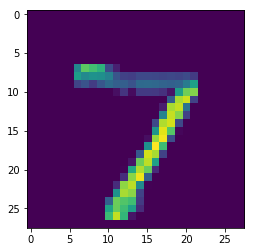

In [9]:
import numpy as np
print(np.argmax(predictions[0]))
plt.imshow(x_test[0])
plt.show()